In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pyabf
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np


##vewhicle
# filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919b_VIP_0000_preCtrl.abf"
# filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919b_VIP_0003.abf"


# filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919c_VIP_0000.abf"
# filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919c_VIP_0002.abf"


#filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919f_VIP_0001.abf"
#filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919f_VIP_0004.abf"

##CNO
# filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919a_VIP_0000_preCNO.abf"
# filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919a_VIP_0002_postCNO.abf"


# filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919d_VIP_0000_preCNO.abf"
# filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919d_VIP_0002_postCNO.abf"

# filepath1 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919e_VIP_0000_preCNO.abf"
# filepath2 = r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919e_VIP_0002_postCNO.abf"



abfCtrl = pyabf.ABF(filepath1)
abfDrug = pyabf.ABF(filepath2)
abfCtrl.setSweep(5)
abfDrug.setSweep(5)

f, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(abfCtrl.sweepX, abfCtrl.sweepY)
ax[1].plot(abfDrug.sweepX, abfDrug.sweepY, color = 'red')

plt.ylim((-80,50))
plt.show()

#/Volumes/brain_slice/Tsai/03-27-19_PV-cre-tdTOM-Cheata_P75/t032719d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-15-19_PV-cre-tdTOM-GCaM6f_P52/t041519d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-17-19_PV-cre-tdTOM-GCaM6f_P54/t041719d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-18-19_PV-cre-tdTOM-GCaM6f_P55/t041819d_PV_0001.abf

NameError: name 'filepath2' is not defined

In [ ]:
Ctrl = []
Drug = []
for sweep in abfCtrl.sweepList:
    abfCtrl.setSweep(sweep,channel=0)
    Ctrl.append(abfCtrl.sweepY)
Ctrl = np.stack(Ctrl)
TimeCtrl = abfCtrl.sweepX

for sweep in abfDrug.sweepList:
    abfDrug.setSweep(sweep,channel=0)
    Drug.append(abfDrug.sweepY)
Drug = np.stack(Drug)
TimeDrug = abfDrug.sweepX

In [ ]:
#find spike method 2 -> better
SpikesCtrl = []
SpikesDrug = []

for sweep in abfCtrl.sweepList:
    abfCtrl.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abfCtrl.sweepY, height=-20)
    SpikesCtrl.append(peak_time)    
    

for sweep in abfDrug.sweepList:
    abfDrug.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abfDrug.sweepY, height=-0)
    SpikesDrug.append(peak_time)
       

In [ ]:
# rastor plot
plt.subplot(1,2,1)
plt.eventplot(SpikesCtrl[0:10])
plt.ylim((0,10))
#plt.ylim((0,len(abfCtrl.sweepList)))
plt.xlim((0,5000))
plt.title('before vehicle')

plt.subplot(1,2,2)
plt.eventplot(SpikesDrug[0:10], color ='red')
plt.ylim((0,10))
#plt.ylim((0,len(abfDrug.sweepList)))
plt.xlim((0,5000))
plt.title('after vehicle')



plt.tight_layout()

In [2]:
abfDrug.sweepList

NameError: name 'abfDrug' is not defined

NameError: name 'TimeCtrl' is not defined

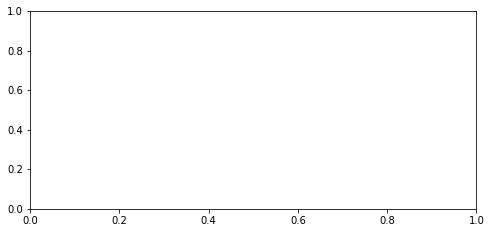

In [3]:
sweep1 =3
sweep2 =7

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(TimeCtrl,Ctrl[sweep1])
plt.plot(SpikesCtrl[sweep1]/10000, Ctrl[sweep1,SpikesCtrl[sweep1]]*1.5, "x", color ='#1f77b4')
plt.plot(TimeCtrl,Ctrl[sweep2], 'red')
plt.plot(SpikesCtrl[sweep2]/10000, Ctrl[sweep2,SpikesCtrl[sweep2]]*1.5, "x", color ='red')
plt.ylabel("voltage (mV)")
plt.xlabel("Time (sec)")

plt.subplot(2,1,2)
plt.plot(TimeDrug,Drug[sweep1])
plt.plot(SpikesDrug[sweep1]/10000, Drug[sweep1,SpikesDrug[sweep1]]*1.5, "x", color ='#1f77b4')
plt.plot(TimeDrug,Drug[sweep2], 'red')
plt.plot(SpikesDrug[sweep2]/10000, Drug[sweep2,SpikesDrug[sweep2]]*1.5, "x", color ='red')

plt.ylabel("voltage (mV)")
plt.xlabel("Time (sec)")

# plt.subplot(3,1,3)
# plt.plot(TimeCtrl, abfDrug.sweepC, color='r')
#plt.plot(abfDrug.sweepX[8], abfDrug.sweepC[8], color='r')

#plt.tight_layout()



In [4]:
# allocate numbers of spikes in each sweep
SpikeNumberCtrl = []
SpikeNumberDrug = []

for i in abfCtrl.sweepList:
    spkn = len(SpikesCtrl[i])
    SpikeNumberCtrl.append(spkn*3.3) # 3.3 is the number to convert spike number to rate (# of spikes/300ms current injection) 

for i in abfDrug.sweepList:
    spkn = len(SpikesDrug[i])
    SpikeNumberDrug.append(spkn*3.3)


NameError: name 'SpikesCtrl' is not defined

ValueError: x and y must be the same size

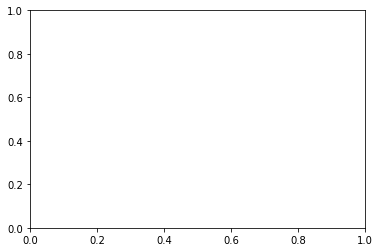

In [5]:
## input-output plot
injection = np.linspace(-1, 13, 15)
plt.scatter(injection[0:8],SpikeNumberCtrl[0:8], label = 'before vehicle')
plt.scatter(injection[0:8],SpikeNumberDrug[0:8], label = 'after vehicle')

plt.xlim(-2,8)
plt.legend( loc='upper left')
plt.xlabel('fold current injection')
plt.ylabel('firing rate (Hz)') 